## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'google', start = '2014-1-1')['Close']

In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.38785868,  0.61214132])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [3]:
np.sum(weights * log_returns.mean()) * 250

0.17027359506320483

Expected Portfolio Variance:

In [4]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.038337027507467321

Expected Portfolio Volatility:

In [5]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.19579843591680532

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [6]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [7]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.093885623682072442,
  0.068050836203379317,
  0.040496533644673302,
  0.19390102409727181,
  0.21344560336079091,
  0.19168256301570641,
  0.18854887380063834,
  0.044902541083382264,
  0.033731407864535622,
  0.010996408966181179,
  0.12708482289354256,
  0.096933751290783937,
  0.097587087356419119,
  0.23603304364960825,
  0.12461481069900728,
  0.12489041283576835,
  0.17268522280063706,
  0.087491988982566354,
  0.18371781370156842,
  0.20406037235139926,
  0.20767295286908016,
  0.066978495759792991,
  0.065045837681361768,
  0.20057626757339986,
  0.12670406029337275,
  0.18098536341222196,
  0.086483773862031224,
  0.13621100233377093,
  0.099090194758181704,
  0.091796830028973112,
  0.098526719537877644,
  0.13877875457629218,
  -0.0019684341196563068,
  0.2256568398711124,
  0.26634396123167492,
  0.14158721617607056,
  0.06409495506515836,
  0.028755280517566512,
  0.21056677015204731,
  0.25293997887220121,
  0.081294707018573581,
  0.21663378665860486,
  0.01802105041

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [8]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([  9.38856237e-02,   6.80508362e-02,   4.04965336e-02,
          1.93901024e-01,   2.13445603e-01,   1.91682563e-01,
          1.88548874e-01,   4.49025411e-02,   3.37314079e-02,
          1.09964090e-02,   1.27084823e-01,   9.69337513e-02,
          9.75870874e-02,   2.36033044e-01,   1.24614811e-01,
          1.24890413e-01,   1.72685223e-01,   8.74919890e-02,
          1.83717814e-01,   2.04060372e-01,   2.07672953e-01,
          6.69784958e-02,   6.50458377e-02,   2.00576268e-01,
          1.26704060e-01,   1.80985363e-01,   8.64837739e-02,
          1.36211002e-01,   9.90901948e-02,   9.17968300e-02,
          9.85267195e-02,   1.38778755e-01,  -1.96843412e-03,
          2.25656840e-01,   2.66343961e-01,   1.41587216e-01,
          6.40949551e-02,   2.87552805e-02,   2.10566770e-01,
          2.52939979e-01,   8.12947070e-02,   2.16633787e-01,
          1.80210504e-02,   6.61574390e-02,   2.26033429e-01,
          2.19683592e-01,   1.57678445e-01,   7.96845686e-02,
        

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [9]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [10]:
portfolios.head()

,Return,Volatility
0,0.093886,0.163722
1,0.068051,0.160185
2,0.040497,0.161158
3,0.193901,0.210639
4,0.213446,0.224139


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

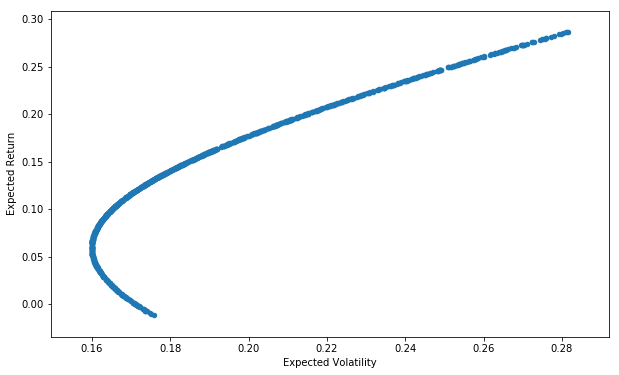

In [11]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [12]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'google', start = '2014-1-1')['Close']

In [13]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,78.91,54.71,47.98
2014-01-03,78.65,54.56,47.87
2014-01-06,78.21,57.20,48.00
2014-01-07,78.45,57.92,48.55
2014-01-08,77.83,58.23,48.73


In [14]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [15]:
num_assets = len(assets)
num_assets

3

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.20682139,  0.59101373,  0.20216488])

In [17]:
weights[0] + weights[1] + weights[2]

0.99999999999999989

Expected Portfolio Return:

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.14757639427709762

Expected Portfolio Variance:

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.037764796465318815

Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.19433166614146757

*****

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ -5.18623348e-02,   2.67036960e-02,   6.35766872e-02,
          6.08518428e-02,   7.79356492e-03,   4.29060872e-02,
          1.67202289e-01,  -2.70557978e-02,   5.99988278e-02,
          8.71846597e-02,   1.21084544e-01,   2.40138473e-02,
          1.31137393e-01,   9.49163320e-02,   2.92510977e-02,
          3.85654643e-02,   5.82310444e-02,   3.02178922e-02,
          3.23095417e-02,   4.39349892e-02,  -3.41430318e-02,
          1.92646980e-01,   2.11646225e-02,   7.22047379e-02,
          3.41162203e-02,   1.96374873e-01,   7.84713372e-02,
          5.09013505e-02,   1.37592033e-01,  -3.36116128e-04,
          1.07376348e-01,   9.72793819e-02,  -4.39397909e-03,
          4.61840111e-02,   5.71825664e-02,  -1.39853489e-02,
          2.41963179e-02,  -2.67104368e-02,   5.56289304e-02,
          1.13506325e-01,   1.24060728e-01,  -5.55323389e-04,
          5.21311737e-02,  -2.89486306e-02,   6.74144732e-02,
         -5.85067551e-03,   4.76573982e-02,   1.20327924e-02,
        

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

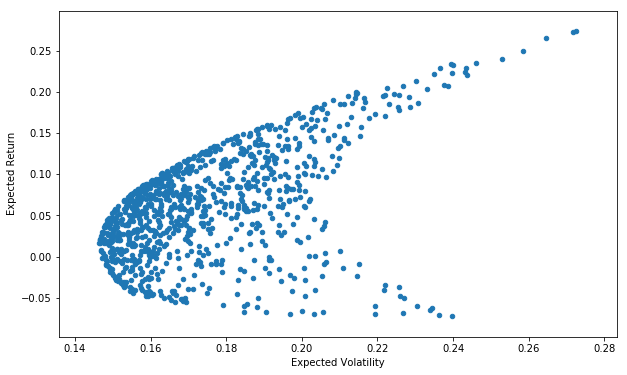

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')